<a href="https://colab.research.google.com/github/diosamuel/road-crack-detection/blob/main/GLCM_FEATURE_EXTRACTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Downloader via Roboflow

download image that has been bounded box help by roboflow

In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 116.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [11]:
!rm -r /content/RoadCrack-2

In [12]:
import os
import json
from roboflow import Roboflow
rf = Roboflow(api_key="4V6T95yomp7w4ccYHkYr")
project = rf.workspace("foreveyrone").project("roadcrack-4xqqm")
version = project.version(3)
dataset = version.download("voc")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to RoadCrack-3 in voc:: 100%|██████████| 679/679 [00:02<00:00, 286.70it/s]


In [3]:
!pip install opencv-python

In [4]:
!pip install pillow

# Cut Image based on bounding box

In [15]:
# !mkdir /content/cropped/
# !mkdir /content/cropped/retak
!mkdir /content/cropped/tidak-retak

mkdir: cannot create directory ‘/content/cropped/tidak-retak’: File exists


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [16]:
import xml.etree.ElementTree as ET
from PIL import Image
# tree = ET.parse('data.xml')
# root = tree.getroot()

dir = os.listdir("/content/RoadCrack-3/train")
for i in dir:
  if ".xml" in i:
    with open(f"/content/RoadCrack-3/train/{i}") as f:
      content = f.read().strip()
      value = ET.fromstring(content)
      if not value.find(".//bndbox/xmin") is None:
        paths = f"/content/RoadCrack-3/train/{value.find('path').text}"
        xmin = int(value.find(".//bndbox/xmin").text)
        xmax = int(value.find(".//bndbox/xmax").text)
        ymin = int(value.find(".//bndbox/ymin").text)
        ymax = int(value.find(".//bndbox/ymax").text)
        img = Image.open(paths)
        cropped_img = img.crop((xmin, ymin, xmax, ymax)).resize((64*4, 64*4))
        classifier = value.find(".//name").text
        cropped_img.save(f"/content/cropped/{classifier}/cropped_{value.find('path').text}")
        # if cropped_img:
          # cv2.imwrite(f"/content/cropped/cropped_{paths}", cropped_img)


In [ ]:
!ls /content/cropped/cropped_IMG_20251113_143926_jpg.rf.6b037bbfd44fbba61dd2abc72d898d36.jpg

/content/cropped/cropped_IMG_20251113_143926_jpg.rf.6b037bbfd44fbba61dd2abc72d898d36.jpg


# GLCM Features

Contrast, Dissimilarity, Homogeneity, Energy and Correlation

In [8]:
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
from skimage import data, io, feature, util, transform
from matplotlib import pyplot as plt

In [9]:
example = "/content/cropped/cropped_IMG_20251113_143926_jpg.rf.6b037bbfd44fbba61dd2abc72d898d36.jpg"

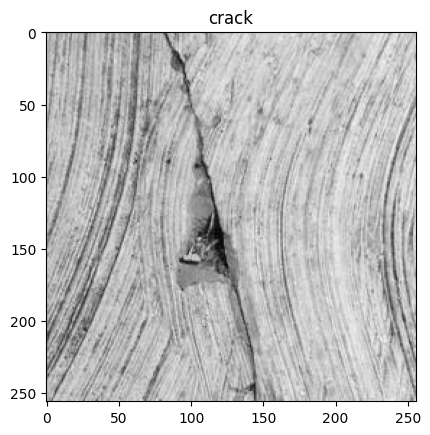

In [10]:
im_frame = Image.open(example).resize((64*4, 64*4))
image = (255*rgb2gray(np.array(im_frame))).astype(np.uint8)
imaged = util.img_as_ubyte(image)

plt.imshow(imaged, cmap='gray')
plt.title(f'crack')
plt.show()

array([[177, 162, 157, ..., 203, 184, 177],
       [181, 171, 152, ..., 183, 170, 173],
       [180, 181, 148, ..., 164, 164, 175],
       ...,
       [181, 162, 142, ..., 134, 168, 172],
       [160, 149, 133, ..., 116, 152, 187],
       [164, 150, 156, ..., 121, 157, 210]], dtype=uint8)
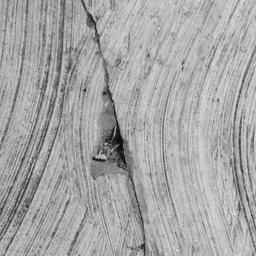

In [ ]:
imaged

In [11]:
def glcm_process(img,path="/content/cropped/"):
  im_frame = Image.open(f"{path}{img}").resize((64*2, 64*2))
  image = (256*rgb2gray(np.array(im_frame))).astype(np.uint8)
  image = util.img_as_ubyte(image)
  distances = [50]
  angles = [np.pi/2]
  glcm = graycomatrix(image,distances=distances,angles=angles,levels=256,symmetric=True,normed=True)
  contrast = graycoprops(glcm,'contrast')
  dissimilarity = graycoprops(glcm,'dissimilarity')
  homogeneity = graycoprops(glcm,'homogeneity')
  energy = graycoprops(glcm,'energy')
  correlation = graycoprops(glcm,'correlation')
  return contrast,dissimilarity,homogeneity,energy,correlation

In [12]:
import pandas as pd

df = pd.DataFrame(columns=["contrast","dissimiliarity","homogeneity","energy","correlation"])

In [13]:
df

,contrast,dissimiliarity,homogeneity,energy,correlation


In [14]:
cropped_dir = os.listdir("/content/cropped")
for img in cropped_dir:
  contrast,dissimiliarity,homogeneity,energy,correlation=glcm_process(img)
  row = pd.DataFrame({
      'contrast': contrast[0][0],
      'dissimiliarity': dissimiliarity[0][0],
      'homogeneity': homogeneity[0][0],
      'energy': energy[0][0],
      'correlation': correlation[0][0]
  }, index=[1.5])
  df = pd.concat([df, row], ignore_index=True)

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [15]:
df

,contrast,dissimiliarity,homogeneity,energy,correlation
0,747.272937,21.079627,0.050519,0.018368,-0.024749
1,385.885417,13.711538,0.084520,0.030660,-0.072418
2,606.944411,18.434595,0.061707,0.022271,-0.007030
3,379.325120,15.445112,0.062877,0.022611,-0.000277
4,1429.688201,30.569211,0.033938,0.012503,0.034615
...,...,...,...,...,...
60,846.168069,22.660457,0.044568,0.016059,0.004902
61,387.714543,14.157252,0.086261,0.029875,-0.016827
62,136.311098,9.045673,0.113249,0.037787,-0.025334
63,656.818610,19.861879,0.051474,0.018690,0.026928


Contrast: Measures the local variations in the image. High contrast values indicate large differences between neighboring pixel intensities.

Dissimilarity: Measures the average difference in intensity between neighboring pixels. High dissimilarity values indicate greater heterogeneity in texture.

Homogeneity: Reflects the closeness of the distribution of elements in the GLCM to the GLCM diagonal. High homogeneity values indicate that elements are concentrated along the diagonal, suggesting a more uniform texture.

Energy (or Angular Second Moment): Represents the orderliness or homogeneity of the image. High energy values indicate more uniform texture.

Correlation: Measures the linear dependency between pixel pairs. High correlation values indicate a more predictable texture.

In [16]:
pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.3 MB/s eta 0:00:00
